# Cost Function Lab

## Problem Statement

As in the lecture, you will use the motivating example of **housing price prediction**.

This lab will use a simple data set with only two data points:

- A house with **1000 square feet (sqft)** sold for **$300,000**
- A house with **2000 square feet** sold for **$500,000**

These two points will constitute our **data or training set**.


| Size (1000 sqft) | Price (1000s of dollars)  |
|------------------|---------------------------|
| 1.0              | 300                       |
| 2.0              | 500                       |


You would like to fit a **linear regression model**, so you can then **predict the price for other houses**.


The cost function is defined as:

$$
J(w, b) = \frac{1}{2m} \sum_{i=0}^{m-1} \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)^2
$$

Where, 

$$
f_{w,b}(x^{(i)}) = wx^{(i)} + b
$$

- $f_{w,b}(x^{(i)})$ = ***Prediction*** for example ***i***
- $(f_{w,b}(x^{(i)}) - y^{(i)})^2$ is the squared difference between actual value and prediction.


In [14]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("./deeplearning.mplstyle")

In [15]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

print(x_train)
print(y_train)

[1.  1.7 2.  2.5 3.  3.2]
[250 300 480 430 630 730]


In [4]:
w_range = np.array([200-200,200+200])
tmp_b = 100

w_array = np.arange(*w_range, 5)
w_array


array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
       390, 395])

[1.  1.7 2.  2.5 3.  3.2]


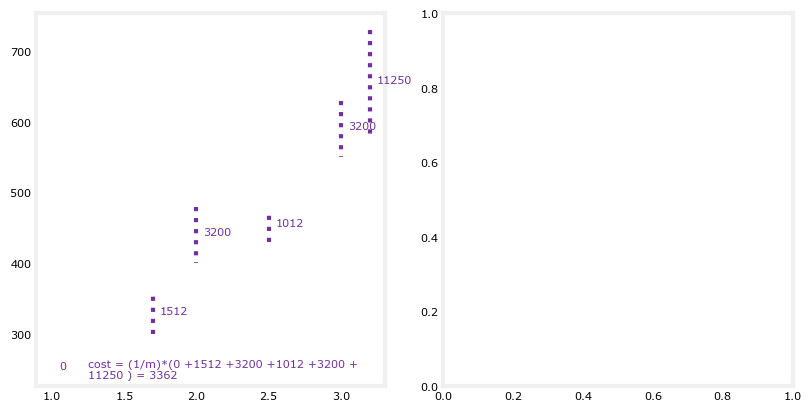

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('./deeplearning.mplstyle')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0';
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')


def mk_cost_lines(x,y,w,b, ax):
    ''' makes vertical cost lines'''
    cstr = "cost = (1/m)*("
    ctot = 0
    label = 'cost for point'
    addedbreak = False

    print(x)
    for p in zip(x,y):
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1],f_wb_p, lw=3, color=dlpurple, ls='dotted', label=label)
        label='' #just one
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data',color=dlpurple,
            xytext=(5, 0), textcoords='offset points')
        cstr += f"{c_p_txt:0.0f} +"
        if len(cstr) > 38 and addedbreak is False:
            cstr += "\n"
            addedbreak = True
        ctot += c_p
    ctot = ctot/(len(x))
    cstr = cstr[:-1] + f") = {ctot:0.0f}"
    ax.text(0.15,0.02,cstr, transform=ax.transAxes, color=dlpurple)


fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(8,4))
w = 150
tmp_b = 100
mk_cost_lines(x_train, y_train, w, tmp_b, ax[0])

In [ ]:

w_range = np.array([200-200,200+200])
tmp_b = 100

w_array = np.arange(*w_range, 5)



[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360 365 370 375 380 385 390 395]
length =  80


In [ ]:
def compute_cost(X, y, w, b):
    m = X.shape[0]   # shape gives [nrows, ncols]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i],w) + b           #(n,)(n,)=scalar
        cost = cost + (f_wb_i - y[i])**2
    cost = cost/(2*m)
    return cost 

w_range = np.array([200-200,200+200])
tmp_b = 100

w_array = np.arange(*w_range, 5)     # It's an array with length = 80,   [ start = 0, end = 395 ]
print(w_array)
print("length = ",len(w_array))

cost = np.zeros_like(w_array)        # Similarly it's the array containg all zeroes, length = 80
print(cost)
for i in range(len(w_array)):
    tmp_w = w_array[i]
    cost[i] = compute_cost(x_train, y_train, tmp_w, tmp_b)

print("cost after:")
print(cost)
print("length of cost : ", len(cost))

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360 365 370 375 380 385 390 395]
length =  80
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
X =  [1.  1.7 2.  2.5 3.  3.2]
y =  [250 300 480 430 630 730]
w =  0
b =  100
X =  [1.  1.7 2.  2.5 3.  3.2]
y =  [250 300 480 430 630 730]
w =  5
b =  100
X =  [1.  1.7 2.  2.5 3.  3.2]
y =  [250 300 480 430 630 730]
w =  10
b =  100
X =  [1.  1.7 2.  2.5 3.  3.2]
y =  [250 300 480 430 630 730]
w =  15
b =  100
X =  [1.  1.7 2.  2.5 3.  3.2]
y =  [250 300 480 430 630 730]
w =  20
b =  100
X =  [1.  1.7 2.  2.5 3.  3.2]
y =  [250 300 480 430 630 730]
w =  25
b =  100
X =  [1.  1.7 2.  2.5 3. 